In [48]:
with open('./share/common.py') as fin:
   exec(fin.read())

In [2]:
with open('./share/matplotlibconf.py') as fin:
    exec(fin.read())

In [36]:
data_file = "Output/wine_cleaned.csv"
df = pd.read_csv(data_file)

### check the size of data from 'description' and 'points'

In [5]:
df.count()

country                  129908
description              129908
points                   129908
price                    120916
province                 129908
region_1                 108724
taster_name              103664
taster_twitter_handle     98695
title                    129908
variety                  129907
winery                   129908
Wine_Year                129908
dtype: int64

#### Grouped by 'points' column, and check the distribution of 'description' over 'points' bin.

In [8]:
df_sub = df[['description', 'points']]
df_sub.groupby(['points']).count()

,description
points,
80,397
81,692
82,1835
83,3024
84,6478
...,...
96,523
97,229
98,77


### Plot the distribution of 21 different points values

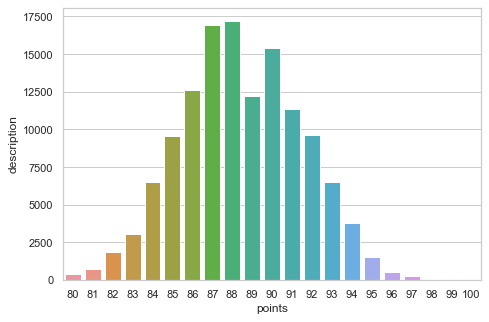

In [30]:
sns.set(style="whitegrid")
data = df_sub.groupby(['points']).count().reset_index()
sns.barplot(x='points', y='description', data=data)

### Description length vs Points

In [37]:
df_sub = df_sub.assign(description_len = df_sub['description'].apply(len))

In [38]:
df_sub.head()

,description,points,description_len
0,Aromas include tropical fr...,87,172
1,"This is ripe and fruity, a...",87,227
2,"Tart and snappy, the flavo...",87,186
3,"Pineapple rind, lemon pith...",87,199
4,Much like the regular bott...,87,249


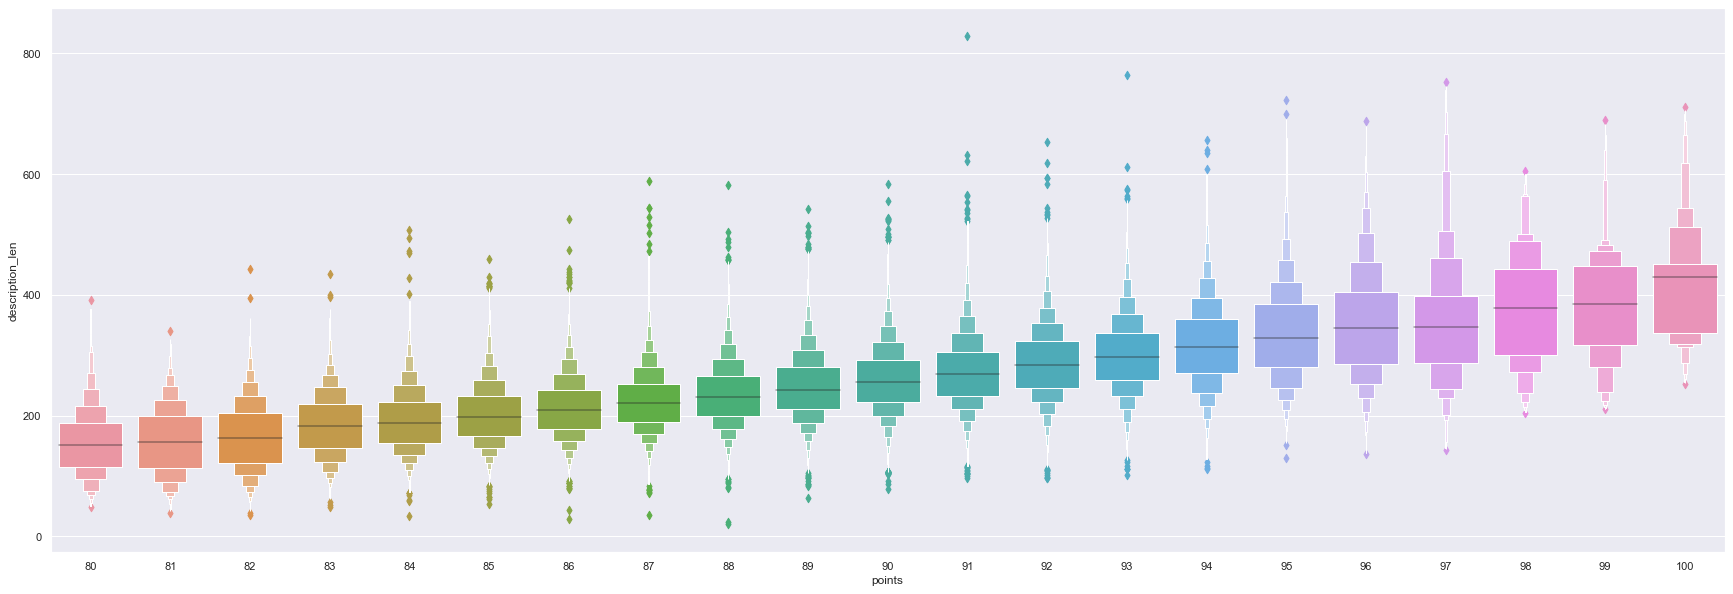

In [72]:
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.boxenplot(x='points', y='description_len', data=df_sub)

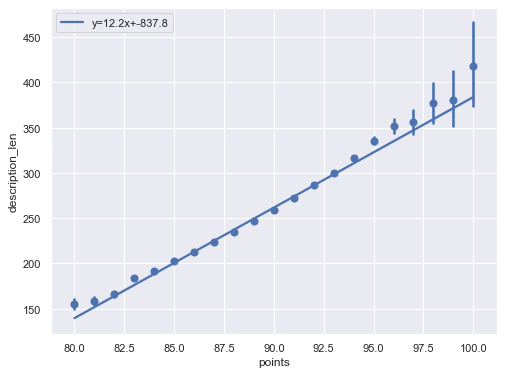

In [84]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['points'], df_sub['description_len'])
fig, ax = plt.subplots()
sns.set(color_codes=True)
ax = sns.regplot(x='points', y='description_len', data=df_sub, x_estimator=np.mean, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [ ]:
# simplified points 
def to_simplified_score(points):
    if points < 84:
        return 1
    elif points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 
    else:
        return 5

In [78]:
bins = [0, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df_sub['points_binned'] = pd.cut(df_sub['points'], bins=bins, labels=labels)
df_sub

,description,points,description_len,binned,points_binned
0,Aromas include tropical fr...,87,172,4,4
1,"This is ripe and fruity, a...",87,227,4,4
2,"Tart and snappy, the flavo...",87,186,4,4
3,"Pineapple rind, lemon pith...",87,199,4,4
4,Much like the regular bott...,87,249,4,4
...,...,...,...,...,...
129903,Notes of honeysuckle and c...,90,227,5,5
129904,Citation is given as much ...,90,233,5,5
129905,Well-drained gravel soil g...,90,225,5,5
129906,"A dry style of Pinot Gris,...",90,216,5,5


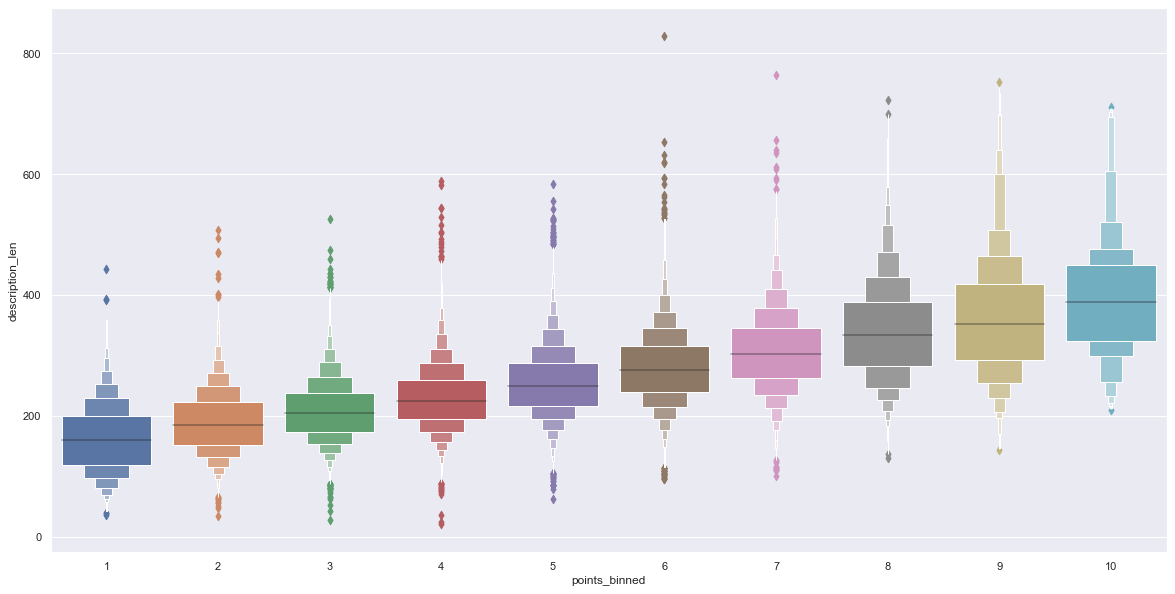

In [82]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(color_codes=True)
sns.boxenplot(x='points_binned', y='description_len', data=df_sub)

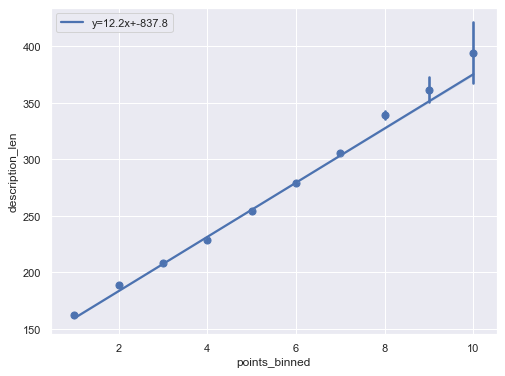

In [87]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['points'], df_sub['description_len'])
fig, ax = plt.subplots()
sns.set(color_codes=True)
ax = sns.regplot(x='points_binned', y='description_len', x_estimator=np.mean, data=df_sub, color='b', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()